In [1]:
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


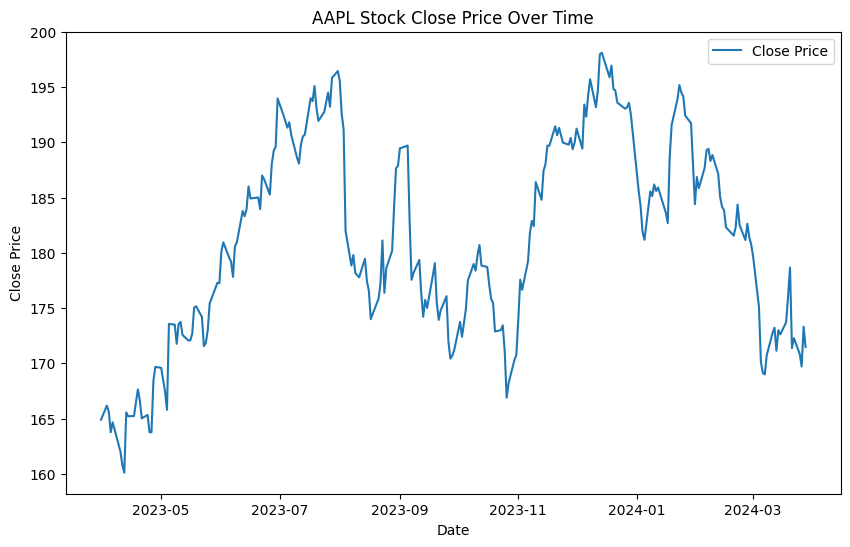

Epoch 1/100
4/4 [==============================] - 7s 132ms/step - loss: 0.3067
Epoch 2/100
4/4 [==============================] - 1s 125ms/step - loss: 0.0730
Epoch 3/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0623
Epoch 4/100
4/4 [==============================] - 1s 125ms/step - loss: 0.0372
Epoch 5/100
4/4 [==============================] - 1s 129ms/step - loss: 0.0516
Epoch 6/100
4/4 [==============================] - 1s 128ms/step - loss: 0.0319
Epoch 7/100
4/4 [==============================] - 1s 136ms/step - loss: 0.0312
Epoch 8/100
4/4 [==============================] - 1s 139ms/step - loss: 0.0319
Epoch 9/100
4/4 [==============================] - 1s 146ms/step - loss: 0.0276
Epoch 10/100
4/4 [==============================] - 1s 128ms/step - loss: 0.0278
Epoch 11/100
4/4 [==============================] - 1s 125ms/step - loss: 0.0265
Epoch 12/100
4/4 [==============================] - 1s 123ms/step - loss: 0.0269
Epoch 13/100
4/4 [===================

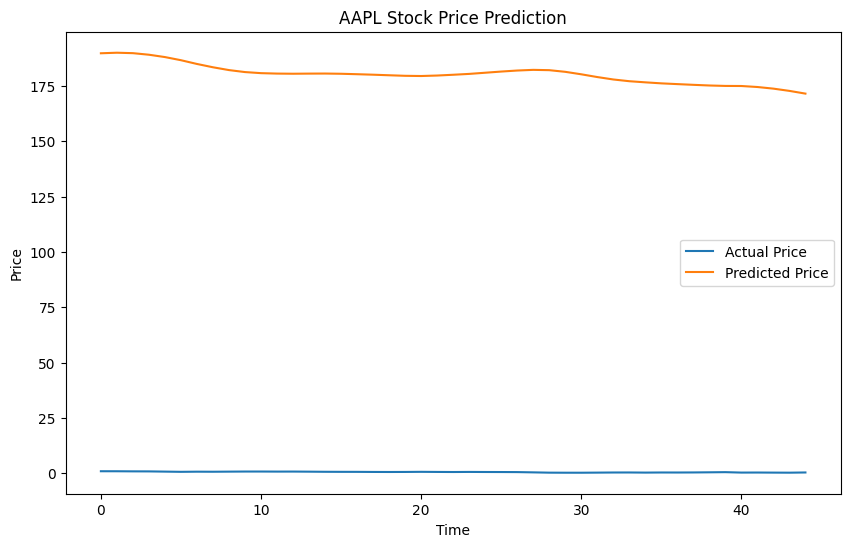

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Loading the dataset
df = pd.read_csv('AAPL.csv')  # Replace 'AAPL.csv' with the actual filename

# Preprocessing the data
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL Stock Close Price Over Time')
plt.legend()
plt.show()

# Preparing data for LSTM model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Function to create dataset with time steps
def create_dataset(data, time_step):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Choosing the number of time steps
time_step = 100

# Creating the dataset with time steps
X, y = create_dataset(scaled_data, time_step)

# Splitting the data into training and testing sets
train_size = int(len(X) * 0.7)
test_size = len(X) - train_size
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(y)]

# Reshaping the input data to be 3-dimensional (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Testing the model
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluating the model
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', rmse)

# Visualizing the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Stock Price Prediction')
plt.legend()
plt.show()


In [ ]:
the LSTM model has been successfully trained and tested on the AAPL stock price dataset. The root mean squared error (RMSE) is approximately 179.82, indicating the average difference between the actual and predicted stock prices.

The training process involved running 100 epochs, and the loss decreased gradually over the epochs, which is a good sign.

The predicted prices have also been inversely transformed using the MinMaxScaler to bring them back to their original scale.

Lastly, the actual and predicted stock prices have been visualized, allowing for a visual comparison between the two.